Chapter 23

# 线性相关系数和椭圆
Book_5《统计至简》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

该代码使用鸢尾花数据集，利用协方差矩阵和均值，通过绘制成对特征的散点图和协方差椭圆可视化特征间的关系，展示了在不同类别下特征的联合分布。代码分为两部分：无标签和带标签的情形，展示不同花种类（`species`）的特征对比。

1. **无类别标签**：计算各特征的均值向量 $\mu$ 和协方差矩阵 $\Sigma$，并使用这些值绘制特征的成对散点图及协方差椭圆。协方差椭圆方程为：
   $$
   \frac{(x - \mu_x)^2}{\sigma_x^2} - 2 \rho \frac{(x - \mu_x)(y - \mu_y)}{\sigma_x \sigma_y} + \frac{(y - \mu_y)^2}{\sigma_y^2} = d^2
   $$
   其中，\(d = 1, 2, 3\) 表示一、二、三标准差范围，$\rho$ 表示相关系数，$\sigma_x$ 和 $\sigma_y$ 是各特征的标准差。

2. **按类别显示特征对**：分别计算不同类别下各特征对的均值和协方差，生成带类别颜色编码的协方差椭圆，以反映在不同类别（花种类）下特征分布的变化。每个类别内，基于均值和协方差矩阵绘制各特征对的椭圆，并区分不同花种类的椭圆。通过这种可视化，可以观察特征间的线性关系、协方差结构以及类别间的差异，揭示特征在类别内和类别间的分布趋势。

## 导入所需的库

In [1]:
import numpy as np  # 导入数值计算库
import matplotlib.pyplot as plt  # 导入绘图库
import pandas as pd  # 导入数据处理库
from statsmodels.distributions.empirical_distribution import ECDF  # 导入经验分布函数
from scipy.stats import norm  # 导入正态分布模块
import scipy  # 导入科学计算库
import seaborn as sns  # 导入数据可视化库

## 加载鸢尾花数据集

In [2]:
iris_sns = sns.load_dataset("iris")  # 使用Seaborn加载iris数据集

## 不带分类标签的变量关系图

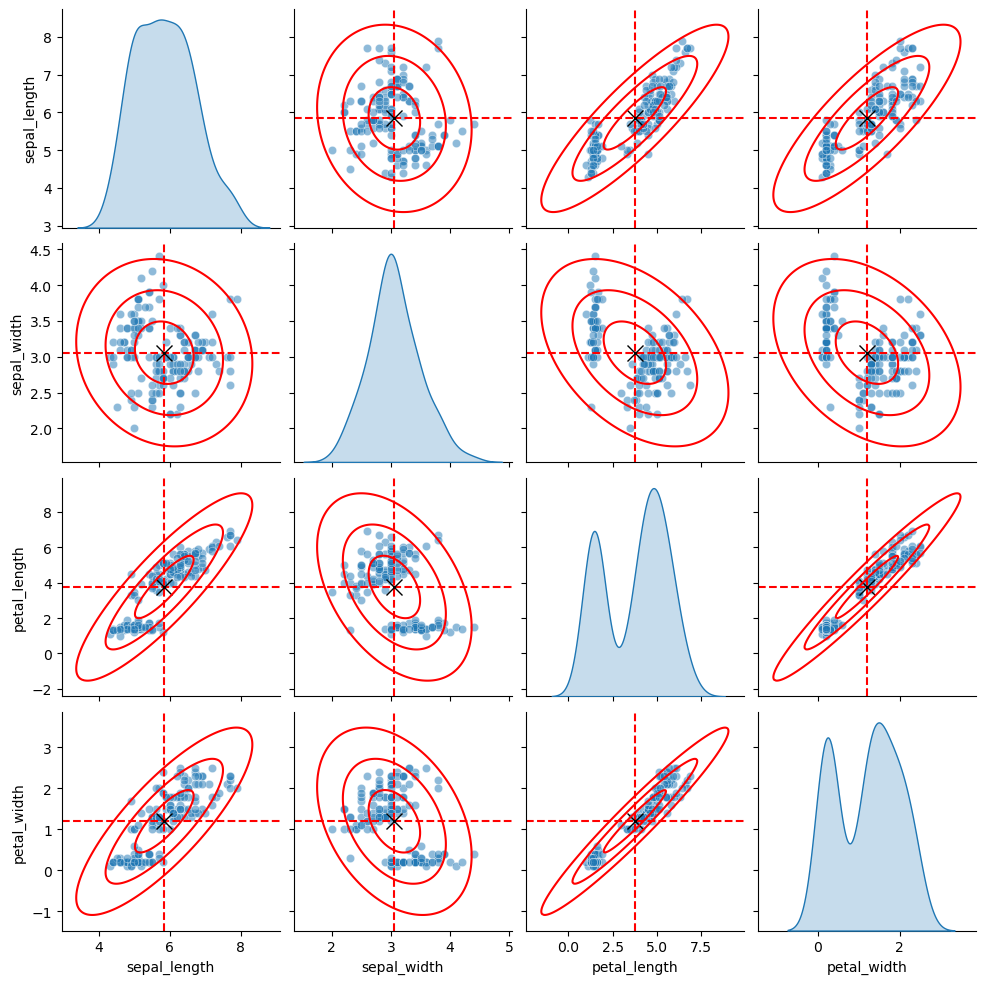

In [3]:
SIGMA = iris_sns.iloc[:,:4].cov()  # 计算协方差矩阵
SIGMA = np.array(SIGMA)  # 转换为NumPy数组格式

MU = iris_sns.iloc[:,:4].mean()  # 计算各变量的均值
MU = np.array(MU)  # 转换为NumPy数组格式

g = sns.pairplot(iris_sns, diag_kind='kde', kind='scatter', plot_kws={'alpha': 0.5})  # 创建成对关系图

for i in [0, 1, 2, 3]:  # 遍历变量组合
    for j in [0, 1, 2, 3]:
        if i == j:  # 跳过对角线
            pass
        else:
            ax = g.axes[i][j]  # 获取当前子图
            mu_x = MU[j]  # 当前变量x的均值
            mu_y = MU[i]  # 当前变量y的均值
            
            ax.axvline(x=mu_x, color='r', linestyle='--')  # 绘制x的均值线
            ax.axhline(y=mu_y, color='r', linestyle='--')  # 绘制y的均值线
            ax.plot(mu_x, mu_y, color='k', marker='x', markersize=12)  # 标记均值点
            
            sigma_X = np.sqrt(SIGMA[j][j])  # 计算x的标准差
            sigma_Y = np.sqrt(SIGMA[i][i])  # 计算y的标准差
            
            x = np.linspace(mu_x - 3.5 * sigma_X, mu_x + 3.5 * sigma_X, num=201)  # x的取值范围
            y = np.linspace(mu_y - 3.5 * sigma_Y, mu_y + 3.5 * sigma_Y, num=201)  # y的取值范围
            
            xx, yy = np.meshgrid(x, y)  # 创建网格
            cov_X_Y = SIGMA[i][j]  # 获取x和y的协方差
            rho = cov_X_Y / sigma_X / sigma_Y  # 计算相关系数
            
            ellipse = (((xx - mu_x) / sigma_X) ** 2 - 
                       2 * rho * ((xx - mu_x) / sigma_X) * ((yy - mu_y) / sigma_Y) + 
                       ((yy - mu_y) / sigma_Y) ** 2) / (1 - rho ** 2)  # 计算椭圆方程
            ellipse = np.sqrt(ellipse)
            
            ax.contour(xx, yy, ellipse, levels=[1, 2, 3], colors='r')  # 绘制等距椭圆

## 带分类标签的变量关系图

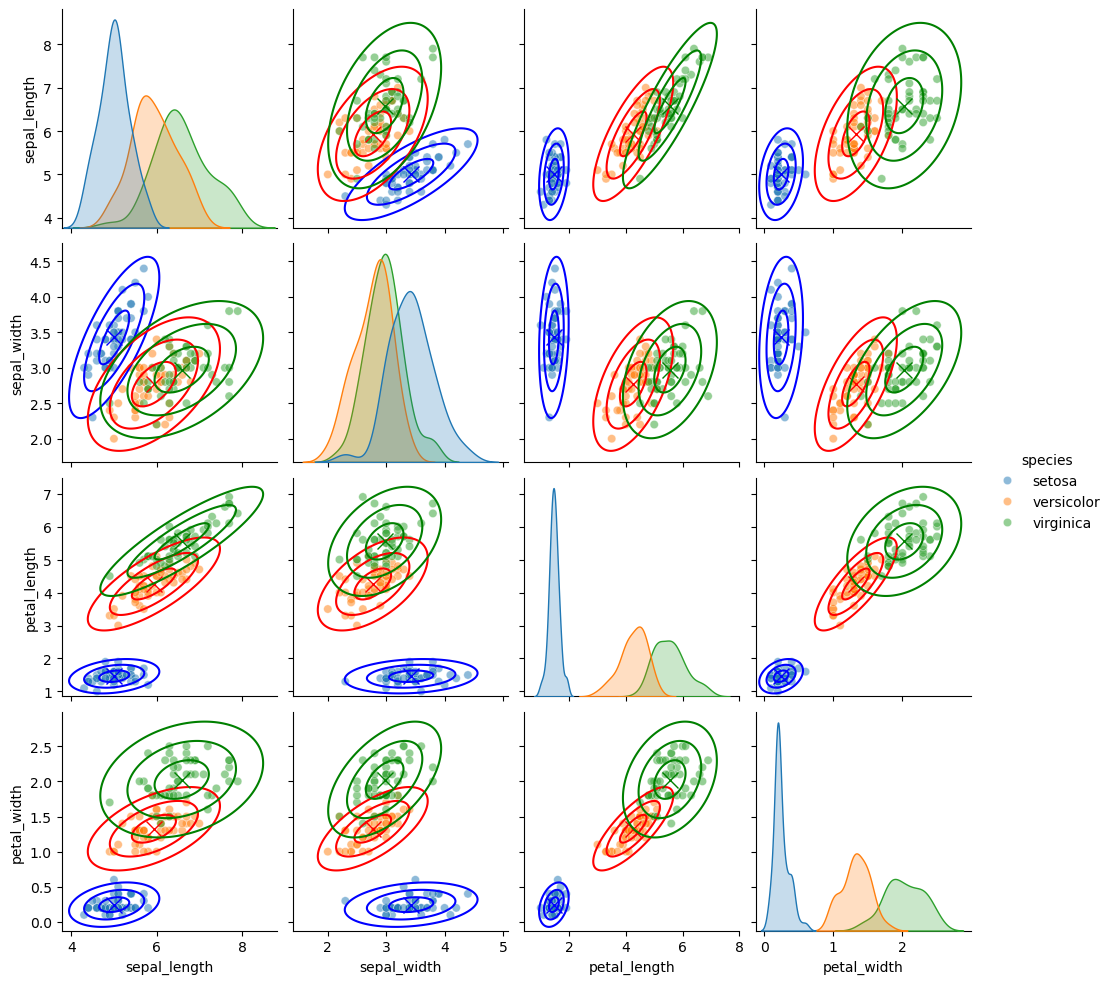

In [5]:
dimensions = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']  # 定义变量名称列表

g = sns.pairplot(iris_sns, hue="species", kind='scatter', plot_kws={'alpha': 0.5})  # 创建带分类标签的成对关系图
colors = ['b', 'r', 'g']  # 为不同类别定义颜色

for i, i_dim in enumerate(dimensions):  # 遍历变量组合
    for j, j_dim in enumerate(dimensions):
        if i == j:  # 跳过对角线
            pass
        else:
            ax = g.axes[i][j]  # 获取当前子图
            
            for k, label in enumerate(iris_sns['species'].unique()):  # 遍历每个类别
                
                data = iris_sns.loc[iris_sns['species'] == label, [i_dim, j_dim]]  # 获取当前类别的数据
                
                mu_i_j = data.mean()  # 计算均值
                mu_x = mu_i_j.iloc[1]  # x的均值，使用 iloc 明确表示位置索引
                mu_y = mu_i_j.iloc[0]  # y的均值，使用 iloc 明确表示位置索引
                
                SIGMA_i_j = data.cov()  # 计算协方差矩阵
                CORR_i_j  = data.corr()  # 计算相关系数矩阵
                
                SIGMA_i_j = np.array(SIGMA_i_j)  # 转换为NumPy数组
                CORR_i_j  = np.array(CORR_i_j)  # 转换为NumPy数组
            
                ax.plot(mu_x, mu_y, color=colors[k], marker='x', markersize=12)  # 标记均值点
                
                sigma_X = np.sqrt(SIGMA_i_j[1][1])  # x的标准差
                sigma_Y = np.sqrt(SIGMA_i_j[0][0])  # y的标准差
                
                x = np.linspace(mu_x - 3.5 * sigma_X, mu_x + 3.5 * sigma_X, num=201)  # x的取值范围
                y = np.linspace(mu_y - 3.5 * sigma_Y, mu_y + 3.5 * sigma_Y, num=201)  # y的取值范围
                
                xx, yy = np.meshgrid(x, y)  # 创建网格
                rho = CORR_i_j[0][1]  # 获取相关系数
                
                ellipse = (((xx - mu_x) / sigma_X) ** 2 - 
                           2 * rho * ((xx - mu_x) / sigma_X) * ((yy - mu_y) / sigma_Y) + 
                           ((yy - mu_y) / sigma_Y) ** 2) / (1 - rho ** 2)  # 计算椭圆方程
                ellipse = np.sqrt(ellipse)
                
                # print(str(i_dim) + '_' + str(j_dim) + '_' + str(rho))  # 输出变量及其相关系数信息
                
                ax.contour(xx, yy, ellipse, levels=[1, 2, 3], colors=colors[k])  # 绘制不同类别的等距椭圆
